In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ЭТАП 0

In [205]:
#1.Загрузить mobile_prices_2023.csv, вывести первые строки.
df = pd.read_csv('mobile_prices_2023.csv')
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [206]:
#2.Переименовать колонки:
df = df.rename(columns={
    'Phone Name': 'Phone_Name',
    'Rating ?/5': 'Rating',
    'Number of Ratings': 'Num_Ratings',
    'ROM/Storage': 'ROM',
    'Back/Rare Camera': 'Back_Cam',
    'Front Camera': 'Front_Cam',
    'Price in INR': 'Price_INR',
    'Date of Scraping': 'Scrape_Date'
})

In [207]:
#3.Привести данные к числовым форматам: Удалить символы ₹, ,, mAh, GB, MP, и привести к int
df['Price_INR'] = df['Price_INR'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).str.extract('(\d+)')[0].astype('Int64')
df['RAM'] = df['RAM'].str.extract('(\d+)')[0].astype('Int64')
df['ROM'] = df['ROM'].str.extract('(\d+)')[0].astype('Int64')
df['Battery'] = df['Battery'].str.extract('(\d+)')[0].astype('Int64')
df['Back_Cam'] = df['Back_Cam'].str.extract('(\d+)')[0].astype('Int64')
df['Front_Cam'] = df['Front_Cam'].str.extract('(\d+)')[0].astype('Int64')
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '', regex=False).astype('Int64')

In [208]:
#4.Удалить строки с NaN в колонках RAM, ROM, Battery, Processor, Price_INR
df = df.dropna()

In [209]:
# 5.Сохранить подготовленный датасет в data_clean.csv
df.to_csv('data_clean.csv', index=False)

ЭТАП 1

In [210]:
# 6.Посмотреть .info() и .shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Phone_Name   1290 non-null   object 
 1   Rating       1290 non-null   float64
 2   Num_Ratings  1290 non-null   Int64  
 3   RAM          1290 non-null   Int64  
 4   ROM          1290 non-null   Int64  
 5   Back_Cam     1290 non-null   Int64  
 6   Front_Cam    1290 non-null   Int64  
 7   Battery      1290 non-null   Int64  
 8   Processor    1290 non-null   object 
 9   Price_INR    1290 non-null   Int64  
 10  Scrape_Date  1290 non-null   object 
dtypes: Int64(7), float64(1), object(3)
memory usage: 129.8+ KB


In [211]:
df.shape

(1290, 11)

In [212]:
# 7.Вывести список колонок и их типы
df.dtypes

,0
Phone_Name,object
Rating,float64
Num_Ratings,Int64
RAM,Int64
ROM,Int64
Back_Cam,Int64
Front_Cam,Int64
Battery,Int64
Processor,object
Price_INR,Int64


In [213]:
# 8.Проверить наличие пропущенных значений
df.isnull().sum()

,0
Phone_Name,0
Rating,0
Num_Ratings,0
RAM,0
ROM,0
Back_Cam,0
Front_Cam,0
Battery,0
Processor,0
Price_INR,0


In [214]:
# 9.Сколько уникальных процессоров?
df['Processor'].nunique()

240

In [215]:
# 10.Средняя цена по каждому процессору — топ-5 дорогих
top5 = df.groupby('Processor')['Price_INR'].mean().sort_values(ascending=False).head(5)
print(top5)

Processor
Qualcomm Snapdragon 8 Gen 2 Processor       103332.333333
Mediatek Dimensity 9000+ Processor                89999.0
Qualcomm Snapdragon 845 64-bit Processor          80000.0
Google Tensor G2 Processor                   68387.888889
Dimensity 9200 Processor                          66599.0
Name: Price_INR, dtype: Float64


In [216]:
# 11.Сколько моделей с RAM ≥ 8 ГБ?
df[df['RAM'] >= 8].shape[0]

401

In [217]:
# 12.Средняя цена по RAM
df.groupby('RAM')['Price_INR'].mean()

,Price_INR
RAM,
1,7955.692308
2,7825.860215
3,11549.04375
4,12752.352436
6,18614.189781
8,29421.982759
12,50852.591837
512,11147.0


In [218]:
# 13.Количество телефонов с батареей < 3000 мАч
count_Battery3000 = (df['Battery'] < 3000).sum()
print(f'Количество телефонов с батареей ровно 3000мАч: {count_Battery3000}')

Количество телефонов с батареей ровно 3000мАч: 15


In [219]:
# 14.Группировка по ROM и средняя цена
df.groupby('ROM')['Price_INR'].mean()

,Price_INR
ROM,
0,2380.0
4,11915.6
8,10893.0
16,8194.5625
32,10246.197861
64,12757.969945
128,22262.117329
256,39274.727273
512,119999.0


In [220]:
# 15.Сколько моделей с фронтальной камерой ≥ 16 МП?
df[df['Front_Cam'] >= 16].shape[0]

591

In [221]:
# 16.Какой процессор встречается чаще всего?
df['Processor'].value_counts().idxmax()

'Qualcomm Snapdragon 680 Processor'

In [222]:
# 17.Корреляция: RAM, ROM, Battery, Rating с Price_INR
df[['RAM', 'ROM', 'Battery', 'Rating', 'Price_INR']].corr()

,RAM,ROM,Battery,Rating,Price_INR
RAM,1.000000,-0.014764,-0.216614,-0.216097,0.024420
ROM,-0.014764,1.000000,0.088971,0.023639,0.675516
Battery,-0.216614,0.088971,1.000000,0.080119,-0.146502
Rating,-0.216097,0.023639,0.080119,1.000000,-0.024123
Price_INR,0.024420,0.675516,-0.146502,-0.024123,1.000000


In [223]:
# 18.Построить рейтинг процессоров по средней цене и сохранить в CSV
rating_processor = df.groupby('Processor')['Price_INR'].mean().sort_values(ascending=False)
rating_processor.to_csv('rating_processor.csv')

ЭТАП 2

In [224]:
# 19.Вычислить стандартное отклонение и медиану: RAM, Battery
print(f'Стандартное отклонение RAM: {df["RAM"].std().round(2)}')
print(f'Стандартное отклонение Battery: {df["Battery"].std().round(2)}')
print(f'Медиана RAM: {df["RAM"].median()}')
print(f'Медиана Battery: {df["Battery"].median()}')

Стандартное отклонение RAM: 28.27
Стандартное отклонение Battery: 687.77
Медиана RAM: 6.0
Медиана Battery: 5000.0


In [225]:
# 20.Нормализовать Battery вручную (z-score через NumPy)
df['Battery_norm'] = (df['Battery'] - df['Battery'].mean()) / df['Battery'].std()
df[['Battery', 'Battery_norm']].head()

,Battery,Battery_norm
0,5000,0.444996
1,5000,0.444996
2,5000,0.444996
3,5000,0.444996
4,5000,0.444996


In [226]:
# 21.Найти телефоны с батареей выше +1.5σ от среднего
df[df['Battery_norm'] > 1.5]

,Phone_Name,Rating,Num_Ratings,RAM,ROM,Back_Cam,Front_Cam,Battery,Processor,Price_INR,Scrape_Date,Battery_norm
84,"POCO M3 (Cool Blue, 128 GB)",4.3,484582,6,128,48,8,6000,Qualcomm Snapdragon 662 Processor,14999,2023-06-17,1.898972
88,"POCO X3 (Cobalt Blue, 64 GB)",4.3,256360,6,64,64,20,6000,Qualcomm Snapdragon 732G Processor,19999,2023-06-17,1.898972
93,"POCO M3 (Cool Blue, 64 GB)",4.3,125650,4,64,48,8,6000,Qualcomm Snapdragon 662 Processor,11999,2023-06-17,1.898972
94,"POCO M3 (Yellow, 64 GB)",4.3,125650,4,64,48,8,6000,Qualcomm Snapdragon 662 Processor,11999,2023-06-17,1.898972
96,"POCO M3 (Yellow, 64 GB)",4.3,125650,4,64,48,8,6000,Qualcomm Snapdragon 662 Processor,11999,2023-06-17,1.898972
...,...,...,...,...,...,...,...,...,...,...,...,...
1812,"Infinix Smart 5 (Aegean Blue, 32 GB)",4.3,107450,2,32,13,8,6000,MediaTek Helio G25 Processor,7499,2023-06-17,1.898972
1815,"Infinix Smart 5 (Obsidian Black, 32 GB)",4.3,107450,2,32,13,8,6000,MediaTek Helio G25 Processor,7499,2023-06-17,1.898972
1817,"Infinix Smart 5 (7° Purple, 32 GB)",4.3,107450,2,32,13,8,6000,MediaTek Helio G25 Processor,7499,2023-06-17,1.898972
1829,"Infinix Smart 4 (Violet, 32 GB)",4.4,32752,2,32,13,8,6000,MediaTek Helio A22 Processor,8999,2023-06-17,1.898972


In [227]:
# 22.Сколько моделей в диапазоне ±1σ от средней цены?
df['Price_INR_norm'] = (df['Price_INR'] - df['Price_INR'].mean()) / df['Price_INR'].std()

 ЭТАП 3

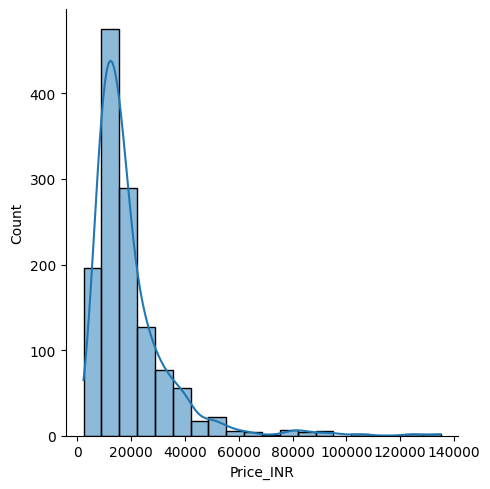

In [228]:
# 23.Гистограмма и distplot: Price_INR
sns.displot(df['Price_INR'], kde=True, bins=20)
plt.show()

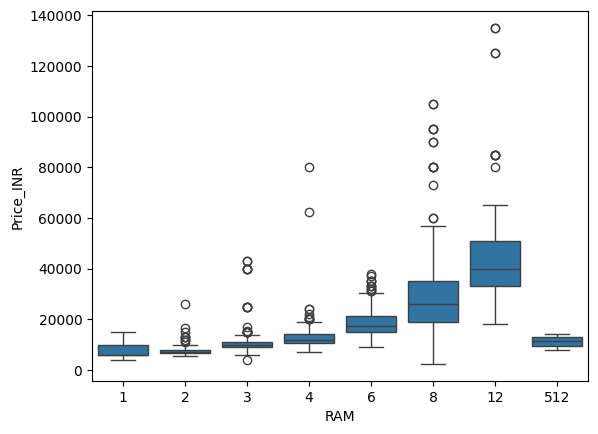

In [229]:
# 24.Boxplot: RAM vs Price_INR
sns.boxplot(x='RAM', y='Price_INR', data=df)
plt.show()

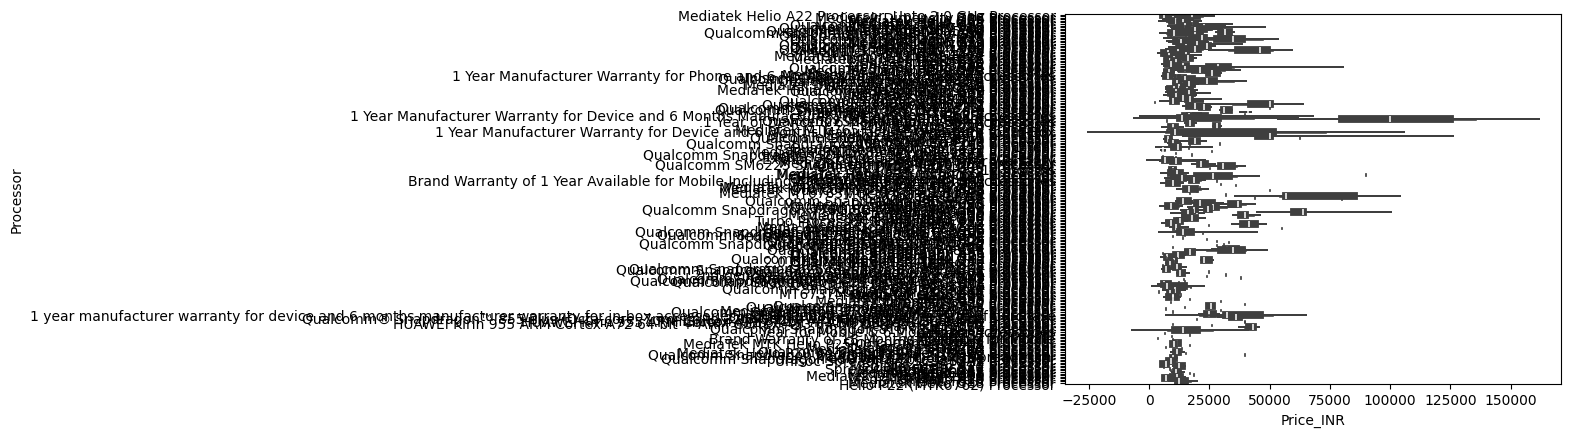

In [230]:
# 25.Violinplot: Processor vs Price_INR
sns.violinplot(y='Processor', x='Price_INR', data=df)
plt.show()

In [231]:
df

,Phone_Name,Rating,Num_Ratings,RAM,ROM,Back_Cam,Front_Cam,Battery,Processor,Price_INR,Scrape_Date,Battery_norm,Price_INR_norm
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2,32,8,5,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,0.444996,-0.940375
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4,64,50,8,5000,Mediatek Dimensity 700 Processor,11999,2023-06-17,0.444996,-0.505614
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4,64,8,5,5000,Helio G36 Processor,6999,2023-06-17,0.444996,-0.847946
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4,64,50,5,5000,Mediatek Helio G85 Processor,7749,2023-06-17,0.444996,-0.796596
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4,64,8,5,5000,Helio G36 Processor,6999,2023-06-17,0.444996,-0.847946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,25582,4,64,48,16,5000,MediaTek Helio G70 Processor,14999,2023-06-17,0.444996,-0.300214
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,25582,4,64,48,16,5000,MediaTek Helio G70 Processor,14999,2023-06-17,0.444996,-0.300214
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,25582,4,64,48,16,5000,MediaTek Helio G70 Processor,14999,2023-06-17,0.444996,-0.300214
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,7117,8,128,48,16,4500,MediaTek Helio G90T Processor,18999,2023-06-17,-0.281991,-0.026348


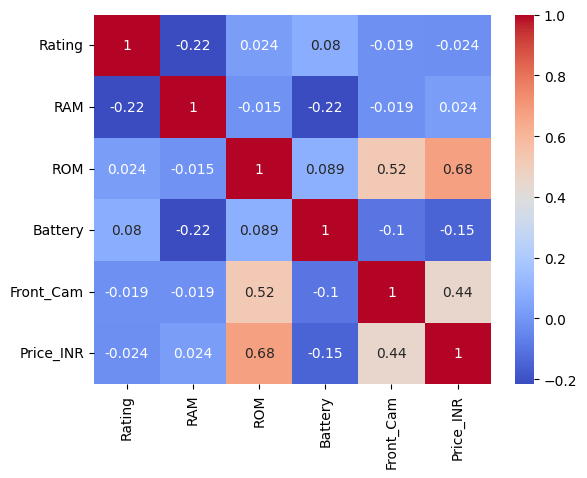

In [232]:
# 26.Heatmap корреляций (Rating, RAM, ROM, Battery, Front_Cam, Price_INR)
corr = df[['Rating', 'RAM', 'ROM', 'Battery', 'Front_Cam', 'Price_INR']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

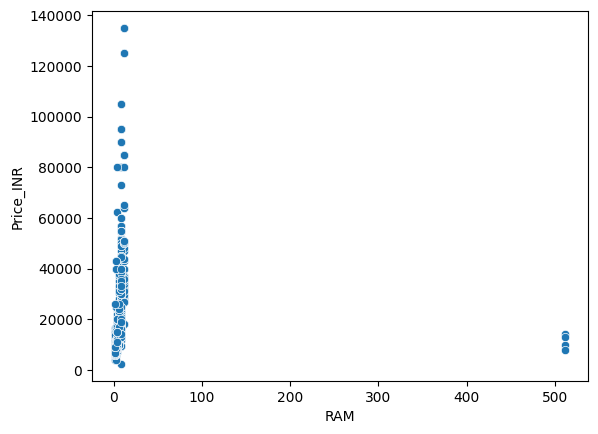

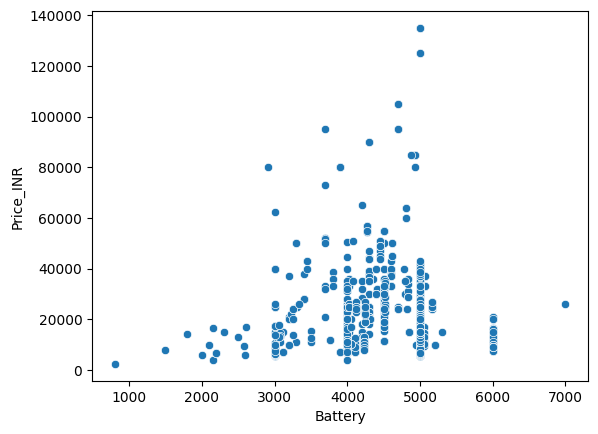

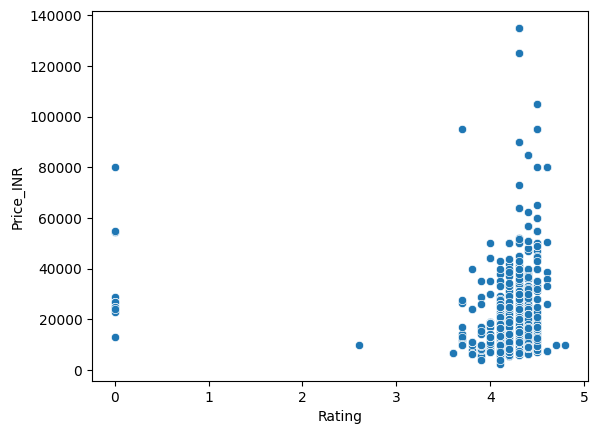

In [233]:
# 27.Scatterplots:
# RAM vs Price_INR
# Battery vs Price_INR
# Rating vs Price_INR
sns.scatterplot(x='RAM', y='Price_INR', data=df)
plt.show()

sns.scatterplot(x='Battery', y='Price_INR', data=df)
plt.show()

sns.scatterplot(x='Rating', y='Price_INR', data=df)
plt.show()

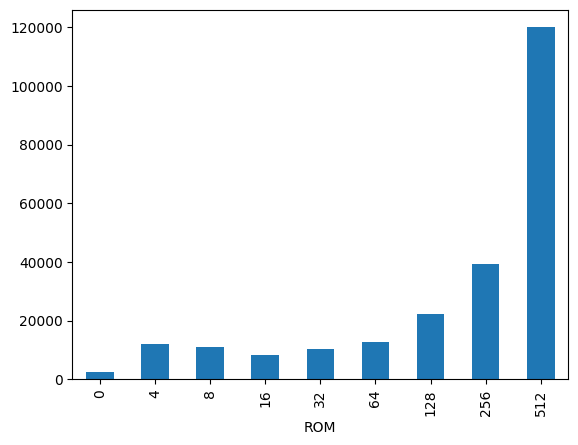

In [234]:
# 28.Barplot: средняя цена по ROM
df.groupby('ROM')['Price_INR'].mean().plot(kind='bar')
plt.show()

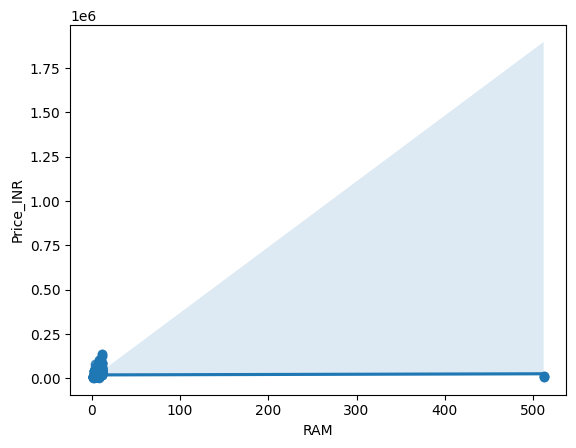

In [235]:
# 29.Regplot: RAM vs Price_INR
sns.regplot(x='RAM', y='Price_INR', data=df)
plt.show()

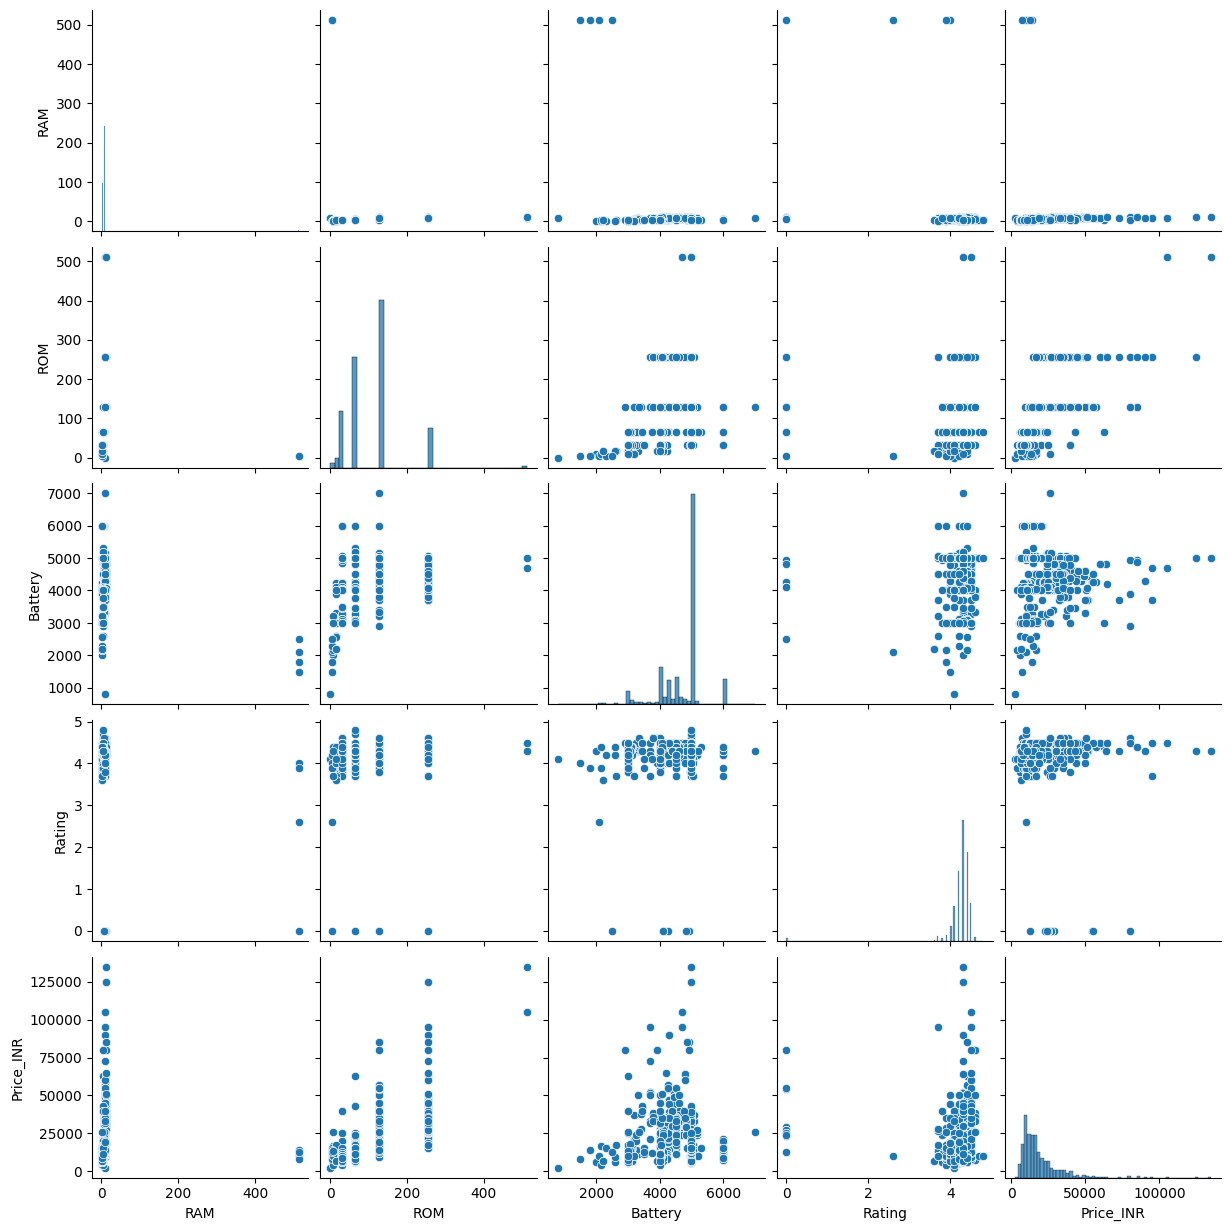

In [236]:
# 30.Pairplot по числовым признакам
sns.pairplot(df[['RAM', 'ROM', 'Battery', 'Rating', 'Price_INR']])
plt.show()

ЭТАП 4

In [237]:
df

,Phone_Name,Rating,Num_Ratings,RAM,ROM,Back_Cam,Front_Cam,Battery,Processor,Price_INR,Scrape_Date,Battery_norm,Price_INR_norm
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2,32,8,5,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,0.444996,-0.940375
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4,64,50,8,5000,Mediatek Dimensity 700 Processor,11999,2023-06-17,0.444996,-0.505614
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4,64,8,5,5000,Helio G36 Processor,6999,2023-06-17,0.444996,-0.847946
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4,64,50,5,5000,Mediatek Helio G85 Processor,7749,2023-06-17,0.444996,-0.796596
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4,64,8,5,5000,Helio G36 Processor,6999,2023-06-17,0.444996,-0.847946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,25582,4,64,48,16,5000,MediaTek Helio G70 Processor,14999,2023-06-17,0.444996,-0.300214
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,25582,4,64,48,16,5000,MediaTek Helio G70 Processor,14999,2023-06-17,0.444996,-0.300214
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,25582,4,64,48,16,5000,MediaTek Helio G70 Processor,14999,2023-06-17,0.444996,-0.300214
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,7117,8,128,48,16,4500,MediaTek Helio G90T Processor,18999,2023-06-17,-0.281991,-0.026348


In [238]:
# 31.Обработка пропущенных значений (fillna, dropna)
df.fillna(0, inplace=True)
df.dropna(inplace=True)

In [239]:
# 32.Кодирование Processor (LabelEncoder или OneHot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Processor_encoded'] = le.fit_transform(df['Processor'])

In [240]:
df = df[['Rating', 'RAM', 'ROM', 'Num_Ratings', 'Front_Cam', 'Back_Cam', 'Battery', 'Price_INR']]

In [241]:
# 33.Масштабирование числовых признаков (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

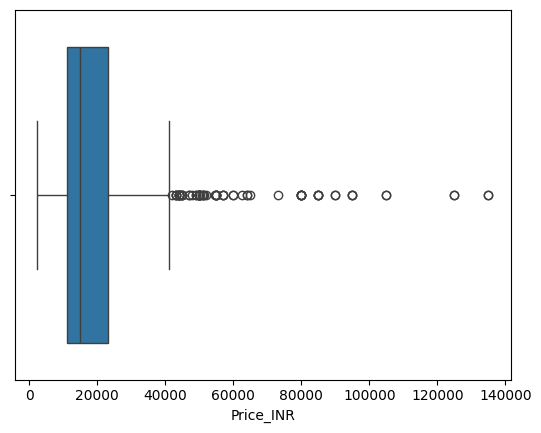

In [242]:
# 34.Проверка и удаление выбросов по Price_INR и Battery
sns.boxplot(x=df['Price_INR'])
plt.show()

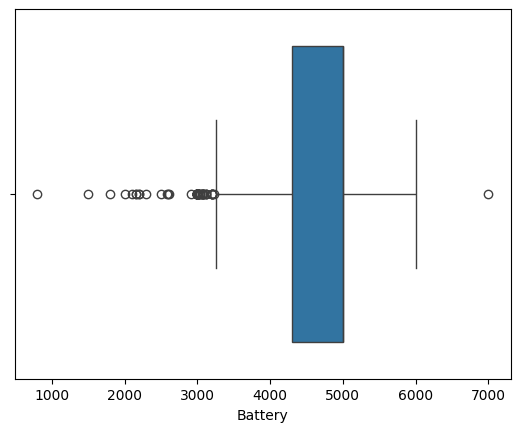

In [243]:
sns.boxplot(x=df['Battery'])
plt.show()

In [244]:
df

,Rating,RAM,ROM,Num_Ratings,Front_Cam,Back_Cam,Battery,Price_INR
0,4.2,2,32,33561,5,8,5000,5649
1,4.2,4,64,77128,8,50,5000,11999
2,4.3,4,64,15175,5,8,5000,6999
3,4.2,4,64,22621,5,50,5000,7749
4,4.3,4,64,15175,5,8,5000,6999
...,...,...,...,...,...,...,...,...
1831,4.3,4,64,25582,16,48,5000,14999
1832,4.3,4,64,25582,16,48,5000,14999
1833,4.3,4,64,25582,16,48,5000,14999
1834,4.2,8,128,7117,16,48,4500,18999


In [245]:
# 35.Деление данных на X и y (y = Price_INR)
X = df[['Rating', 'RAM', 'ROM', 'Num_Ratings', 'Front_Cam', 'Back_Cam', 'Battery']]
y = df['Price_INR']

In [246]:
# 36.Разделение на train/test (80/20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ЭТАП 5

In [247]:
# 37.Построить модель LinearRegression() из sklearn.linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [248]:
# 38.Обучить модель на тренировочных данных
model.fit(X_train, y_train)

LinearRegression()

In [249]:
# 39.Сделать предсказания на тесте
y_pred = model.predict(X_test)

In [250]:
# 40 Оценка метрик:
# MAE (mean absolute error)
# MSE (mean squared error)
# RMSE (root mean squared error)
# R² (коэффициент детерминации)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as mp

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred )
rmse =np.sqrt(mse)
r2 =r2_score(y_test,y_pred)


print(f"MAE: {mae:2f}")
print(f"MSE: {mse:2f}")
print(f"RMSE: {rmse:2f}")
print(f"R2: {r2:2f}")

MAE: 6194.871418
MSE: 101675033.614691
RMSE: 10083.403870
R2: 0.542377


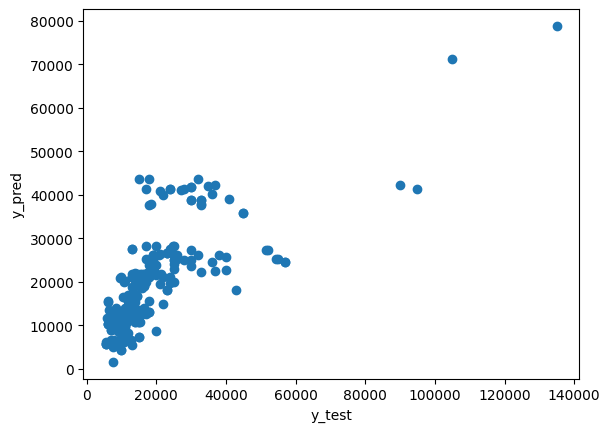

In [251]:
# 41.Визуализация y_test vs y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [252]:
# 42.Печать коэффициентов модели (coef_, intercept_)
print(f"Коэффициенты модели: {model.coef_}")
print(f"Свободный член модели: {model.intercept_}")

Коэффициенты модели: [-1.21780343e+02 -7.60710320e+00  1.25956782e+02 -6.08521287e-03
  7.52809830e+01  6.00043690e+01 -4.64730102e+00]
Свободный член модели: 25242.34316444678


In [253]:
# # 43.Сохранить модель (joblib.dump() или pickle)
# import joblib

# joblib.dump(model, 'mobile_price_model_job.pkl')

In [254]:
# import pickle

# with open('house_price_model_pick.pkl', 'wb') as f:
#   pickle.dump(model, f)

In [255]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

random_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()

In [256]:
random_model.fit(X_train, y_train)

RandomForestRegressor()

In [257]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [258]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [259]:
y_pred_log = model.predict(X_test)
y_pred_rf = random_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [260]:
from sklearn.metrics import r2_score

print('Logistic Regression:', r2_score(y_test, y_pred_log))
print('Random Forest:', r2_score(y_test, y_pred_rf))
print('GB:', r2_score(y_test, y_pred_gb))
print('XGB:', r2_score(y_test, y_pred_xgb))
print(f'R²: {r2:.2f}')

Logistic Regression: 0.5423770365465483
Random Forest: 0.9382890392136101
GB: 0.8721141333861206
XGB: 0.9431619048118591
R²: 0.54


In [261]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(model, 'scaler.pkl')

['scaler.pkl']

In [262]:
df

,Rating,RAM,ROM,Num_Ratings,Front_Cam,Back_Cam,Battery,Price_INR
0,4.2,2,32,33561,5,8,5000,5649
1,4.2,4,64,77128,8,50,5000,11999
2,4.3,4,64,15175,5,8,5000,6999
3,4.2,4,64,22621,5,50,5000,7749
4,4.3,4,64,15175,5,8,5000,6999
...,...,...,...,...,...,...,...,...
1831,4.3,4,64,25582,16,48,5000,14999
1832,4.3,4,64,25582,16,48,5000,14999
1833,4.3,4,64,25582,16,48,5000,14999
1834,4.2,8,128,7117,16,48,4500,18999
